## Project 2
#### Sofiya Patra 
#### 12/5/2024

In [413]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import gzip
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

In [415]:
#Read in Deseq results for D10 vs D0 
df = pd.read_csv('d10vsd0de.csv')
#View head to check format
df.head()

,Unnamed: 0,gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,1,ENSMUSG00000078853,9310.301302,6.306992,0.134573,46.866538,0.000000e+00,0.000000e+00
1,2,ENSMUSG00000028270,10596.015144,6.438342,0.134191,47.978980,0.000000e+00,0.000000e+00
2,3,ENSMUSG00000046879,6441.997984,5.178888,0.106547,48.606547,0.000000e+00,0.000000e+00
3,4,ENSMUSG00000078920,1315.500435,5.211493,0.145380,35.847409,2.018189e-281,1.202942e-277
4,5,ENSMUSG00000069874,4438.570679,4.633860,0.130414,35.531983,1.577054e-276,7.520026e-273


In [417]:
# Load the mapping file
gene_mapping = pd.read_csv("mouse_gene_mapping.csv")

# Merge the datasets on gene_id
df = pd.merge(df, gene_mapping, on="gene_id", how="left")

#View head to check gene_name column added
df.head()


,Unnamed: 0,gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name
0,1,ENSMUSG00000078853,9310.301302,6.306992,0.134573,46.866538,0.000000e+00,0.000000e+00,Igtp
1,2,ENSMUSG00000028270,10596.015144,6.438342,0.134191,47.978980,0.000000e+00,0.000000e+00,Gbp2
2,3,ENSMUSG00000046879,6441.997984,5.178888,0.106547,48.606547,0.000000e+00,0.000000e+00,Irgm1
3,4,ENSMUSG00000078920,1315.500435,5.211493,0.145380,35.847409,2.018189e-281,1.202942e-277,Ifi47
4,5,ENSMUSG00000069874,4438.570679,4.633860,0.130414,35.531983,1.577054e-276,7.520026e-273,Irgm2


In [419]:
#Highlight Serpina3f values
serpina = df[df['gene_name']== 'Serpina3f']
display(serpina)

,Unnamed: 0,gene_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,gene_name
237,238,ENSMUSG00000066363,1693.677066,14.78004,1.188772,12.43303,1.729523e-35,1.732575e-33,Serpina3f


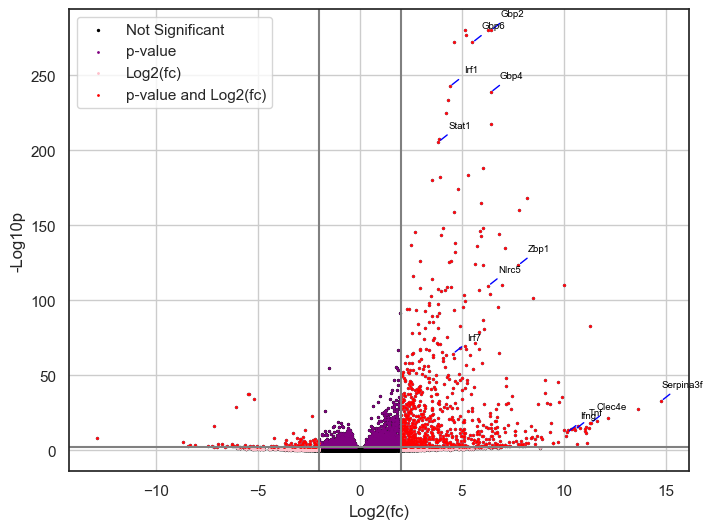

In [421]:
#Create Volcano Plot 

fig = plt.figure(figsize=(8, 6))
#replace 0s 
df['padj'] = df['padj'].replace(0, 1e-280)
#Base plot
plt.scatter(x=df['log2FoldChange'],y=-np.log10(df['padj']),s=2,label="Not Significant", color = "black" )

#group data based on foldchange and pvalue criteria
significant = df[df['padj'] <= 0.01]
changed = df[(abs(df['log2FoldChange']) >=2)]
sigchanged = df[(abs(df['log2FoldChange']) >=2)&(df['padj']<=0.01)]


#Overlay color mappings on the original plot 
plt.scatter(x=significant['log2FoldChange'],y=-np.log10(significant['padj']),s=1,label="p-value",color="purple")
plt.scatter(x=changed['log2FoldChange'],y=-np.log10(changed['padj']),s=1,label="Log2(fc)",color="pink")
plt.scatter(x=sigchanged['log2FoldChange'],y=-np.log10(sigchanged['padj']),s=1,label="p-value and Log2(fc)",color="red")

# Define the specific genes to label
genes_to_label = ['Serpina3f', 'Gbp2', 'Gbp4', 'Nlrc5', 'Zbp1', 'Gbp6', 'Stat1', 'Irf1', 'Irf7', 'Clec4e', 'Ifng', 'Tnf']

# Filter sigchanged for just these genes
label_subset = sigchanged[sigchanged['gene_name'].isin(genes_to_label)]

# Add labels with for the selected genes
for i, r in label_subset.iterrows():
    plt.annotate(
        r['gene_name'], 
        (r['log2FoldChange'], -np.log10(r['padj'])),  # Position of the point
        textcoords="offset points", 
        xytext=(15, 10),  #(x, y) offset 
        ha='center',  # Horizontal alignment of the label
        fontsize=7, 
        color="black",
    arrowprops=dict(
            arrowstyle="-",  # Use a straight line
            color="blue", 
            lw=1))  # Line width

#Add axes labels, reference lines, and legend 
plt.xlabel("Log2(fc)")
plt.ylabel("-Log10p")
plt.axvline(-2,color="grey")
plt.axvline(2,color="grey")
plt.axhline(2,color="grey")
plt.grid()
plt.legend()

#Save figure 
fig.savefig('volcano.png')

In [400]:
#Read in the normalized counts dataframe
df2 = pd.read_csv('normalized_counts.csv', index_col=0)
#View head to check format
df2.head()

,D0_1,D0_2,D0_3,D2_1,D2_2,D2_3,D6_1,D6_2,D6_3,D10_1,D10_2,D10_3
ENSMUSG00000028180,4098.849443,4000.099136,4261.487589,4256.304291,4183.647695,4444.072055,3889.402733,2985.646919,3319.876128,3879.903357,4166.011750,3728.959685
ENSMUSG00000028182,32.426220,13.102805,11.113410,29.736639,37.448304,58.876323,13.011383,17.414661,23.395885,30.033656,31.224943,26.177027
ENSMUSG00000028184,4212.779404,4442.786757,4487.797030,2706.034167,4331.520485,3505.321800,4153.633902,3358.127173,5866.518245,4695.261488,3808.435790,4140.192331
ENSMUSG00000028187,724.769829,737.500730,734.495372,598.697669,664.467341,636.736526,686.600688,584.358632,607.123224,817.582846,729.253508,585.183211
ENSMUSG00000028186,39.437294,73.001341,66.680460,44.604959,39.368730,25.076952,36.031523,75.463532,23.395885,26.696583,76.551473,15.199564


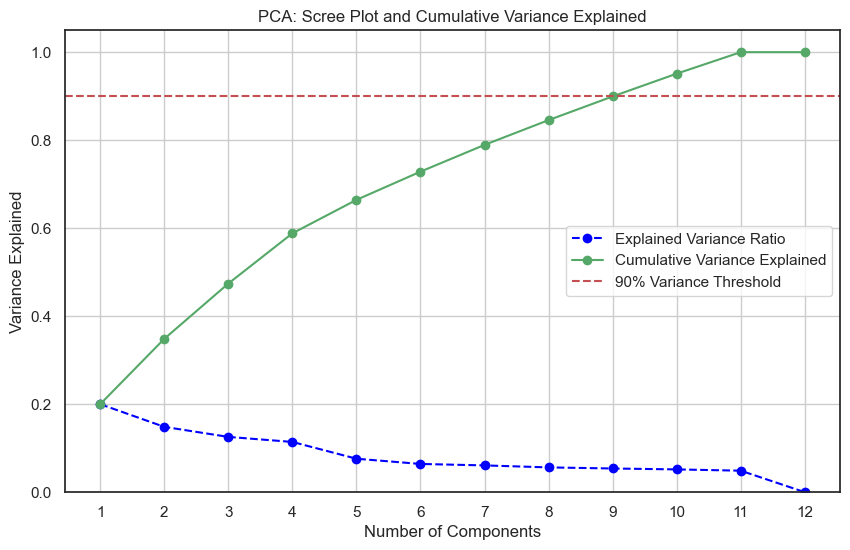

In [306]:
#Create PCA plot using the normalized counts


# Log-transform normalized counts and transpose so genes are features
df2_log_T = np.log2(df2 + 1).T 

# Standardize the gene expression (scale each feature/column) tp mean=0, variance = 1
scaler = StandardScaler()
df2_scaled = scaler.fit_transform(df2_log_T)

pca = PCA()
pca.fit(df2_scaled)

# Get the explained variance ratio for each component and calculate the cumulative variance
explained_variance_ratio = pca.explained_variance_ratio_

cumulative_variance = np.cumsum(explained_variance_ratio)

# Plot Scree Plot and Cumulative Variance Explained
fig2 = plt.figure(figsize=(10, 6))

# Scree Plot
plt.plot(
    range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker ='o', linestyle='--',
    color='blue', label='Explained Variance Ratio')

# Cumulative Variance Explained
plt.plot(
    range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', color='g',
    label='Cumulative Variance Explained')

#Reference threshold for variance (90%)
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance Threshold')

# Add titles and labels
plt.xlabel('Number of Components')
plt.ylabel('Variance Explained')
plt.title('PCA: Scree Plot and Cumulative Variance Explained')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.ylim(0, 1.05)
plt.legend()
plt.grid()

# Show the plot
plt.show()

#Save figure 
fig2.savefig('scree.png')

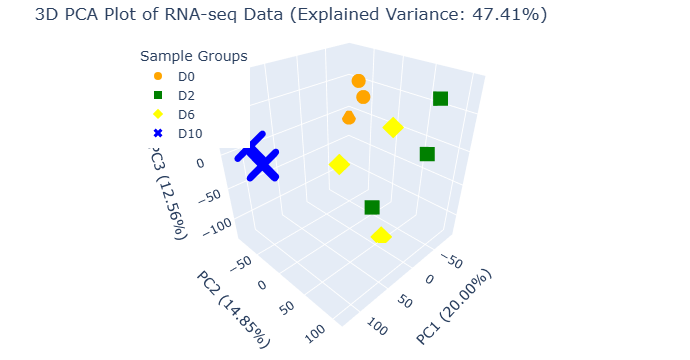

In [320]:
# Perform PCA
pca = PCA(n_components=6)  # First three principal components
principal_components = pca.fit_transform(df2_scaled)

# Convert PCA results to a dataframe
pca_df = pd.DataFrame(principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])
pca_df['Sample'] = df2.columns

# Add a group column to the DataFrame for easier plotting
pca_df['Group'] = df2.columns.str.split('_').str[0]
pca_df['Group'] = pca_df['Group'].astype('category')

#Calculate the total variance explained
total_variance_explained = sum(pca.explained_variance_ratio_[:3]) * 100

symbols = ['circle', 'square', 'diamond', 'x']
colors = ['orange', 'green', 'yellow', 'blue'] 
# Plot using plotly
fig3 = px.scatter_3d(
    pca_df,
    x='PC1', y='PC2', z='PC3',
    color='Group',  # Color by group
    symbol='Group',  # Different symbols for each group
    title=f"3D PCA Plot of RNA-seq Data (Explained Variance: {total_variance_explained:.2f}%)",
    #include variance explained in the PC labels 
    labels={
        'PC1': f'PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)',
        'PC2': f'PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)',
        'PC3': f'PC3 ({pca.explained_variance_ratio_[2]*100:.2f}%)'
    },
    symbol_sequence = symbols,
    color_discrete_sequence=colors

)

# Customize layout
fig3.update_layout(
    legend_title="Sample Groups",
    legend=dict(
        yanchor="top",    # Vertical alignment: 'top', 'middle', 'bottom'
        y=0.99,          # Y position (0 = bottom, 1 = top)
        xanchor="left",  # Horizontal alignment: 'left', 'center', 'right'
        x=0.2           # X position (0 = left, 1 = right)
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)
fig3.show()

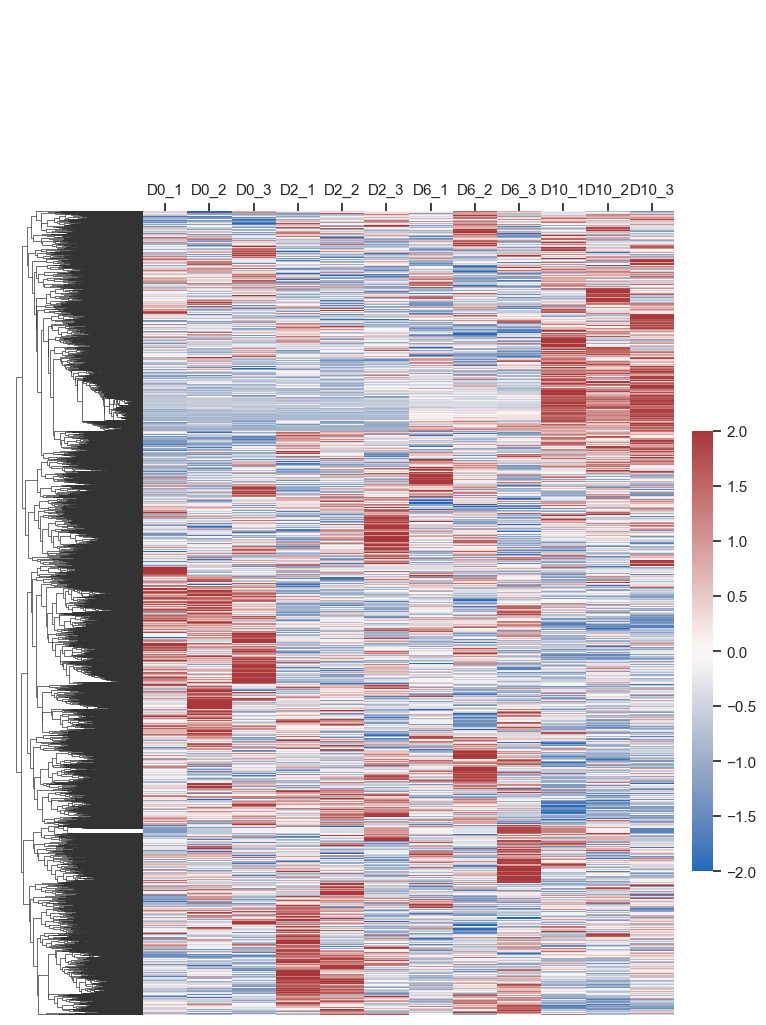

In [402]:
#Create Heatmap

# Set plot aesthetics
sns.set_theme(style="white")

# Plot heatmap with clustering
heatmap = sns.clustermap(
    df2,
    #z-scoring by rows
    z_score = 0,
    cmap="vlag",  # Diverging color map
    center=0,     # Centered at 0 for z-scores
    row_cluster=True,  # Hierarchical clustering for rows (genes)
    col_cluster= False,  # Hierarchical clustering for columns (samples),
    method = 'average',
    metric = 'euclidean',
    vmin=-2,  # Min color scale
    vmax=2,   # Max color scale
    yticklabels=False,
    cbar_pos=(1, .2, .03, .4),
    figsize=(7, 11)
)

heatmap.ax_heatmap.xaxis.tick_top()
heatmap.ax_heatmap.xaxis.set_label_position('top')
plt.show()

heatmap.savefig("heatmap_average_euclidean.png")